# Importing the  boustan dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
df = pd.DataFrame(boston.data)

In [6]:
df.columns = boston.feature_names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
df['MEDV'] = pd.DataFrame(boston.target)

In [8]:
df.shape

(506, 14)

In [9]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Checking for null values and replacing 0s

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
df.replace(0, np.nan, inplace=True)

In [13]:
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

In [14]:
df = df.drop('ZN', axis=1)
df = df.drop('CHAS', axis=1)

# Exploratory 

In [15]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True


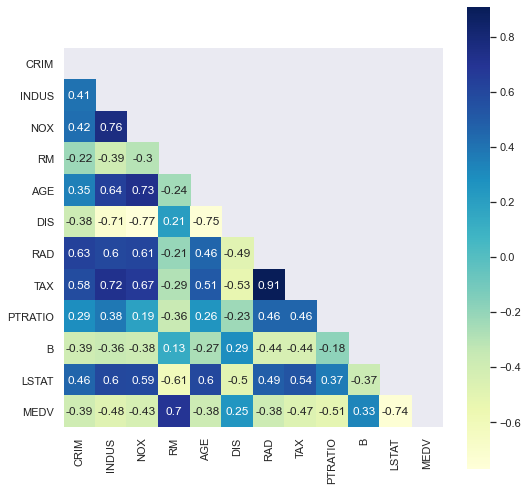

In [16]:
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);


In [17]:
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS']
df = df.drop(columns=columns)

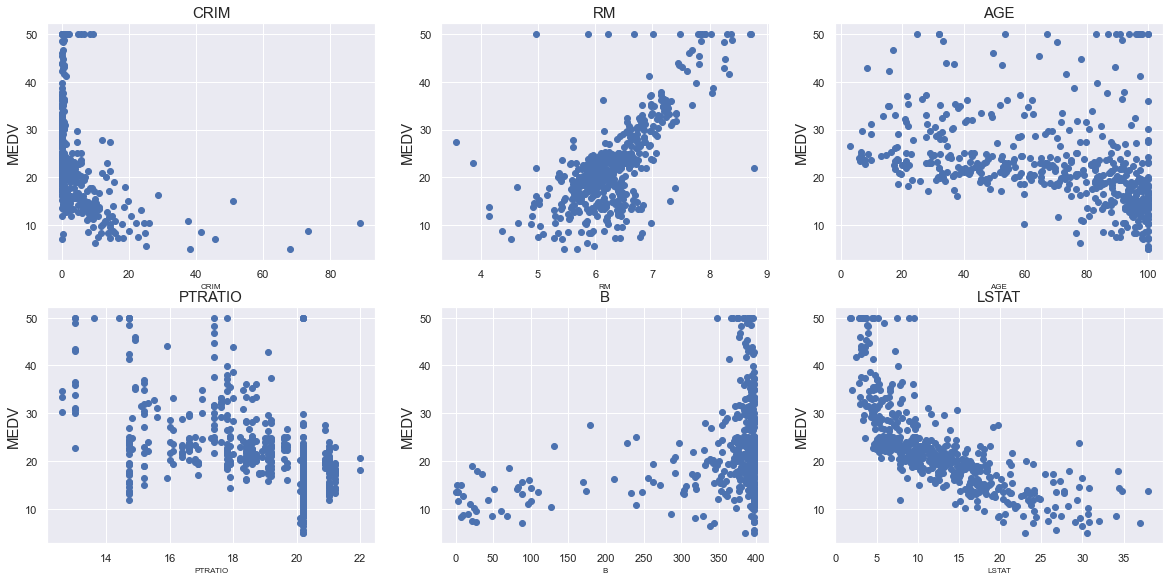

In [49]:
import matplotlib.pyplot as plt
features = df.drop('MEDV', 1).columns
target = df['MEDV']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) 
    plt.ylabel('MEDV', fontsize=15)

In [50]:
X = df[['LSTAT', 'RM']]
y = df.MEDV

In [51]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


# train test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)



print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(339, 2)
(167, 2)
(339,)
(167,)


# linear regression

In [53]:
from sklearn.linear_model import LinearRegression
# Create LinearRegression Instance
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted = lrm.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
def linear_metrics():
    r2 = lrm.score(X_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
    print('r-squared: {}'.format(r2))
    print('---------------------------------------')
    print('root mean squared error: {}'.format(rmse))
linear_metrics()


r-squared: 0.6171865588521173
---------------------------------------
root mean squared error: 5.38244834726787


#  Decision tree 

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
model =  DecisionTreeRegressor(max_depth=5,random_state=0)
model_fit=model.fit(X_train, y_train)
print(model_fit.score(X_train, y_train))
print(model_fit.score(X_test, y_test))

0.8753535869266217
0.7274135657774189


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train, y_train)
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))


coefficient of determination R^2 of the prediction.:  0.8753535869266217
Mean squared error: 20.63
Test Variance score: 0.73


# SVM

In [58]:
from sklearn.svm import SVR
svclassifier = SVR(kernel='poly', degree=2)# non-linear
svclassifier.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

In [59]:
y_pred = svclassifier.predict(X_test)

In [60]:
y_pred

array([24.50439322, 30.81491097, 16.46847669, 27.68964344, 16.83397943,
       21.61350672, 16.33990637, 11.46306962, 20.78007233, 19.53444749,
       16.62228437, 17.23046025, 10.71662882, 21.26694009, 21.80793944,
       22.09684282, 16.9666148 , 11.39812509, 33.73881646, 16.2074412 ,
       26.813896  , 26.44730477, 13.51605948, 23.97896474, 18.38489596,
       17.07425912, 24.14355866, 15.16920468, 17.13334591, 19.82717271,
       19.47639312, 26.38104621, 20.27279663, 23.07376928, 13.9152567 ,
       18.52447167, 30.98866814, 23.51154319, 19.23488316, 25.86969198,
       15.10643161, 26.46681982, 34.22298996, 20.72458507, 24.73583754,
       17.50018218, 16.57793509, 26.86708095, 17.77662755, 28.90998194,
       20.4566123 , 29.95118982, 15.76704363, 26.24226329, 32.61870217,
       22.93997919, 17.48173792, 31.22879413, 23.91087371, 16.61748972,
       24.26668974, 30.15904914, 30.20851883, 21.87468292, 28.36294609,
       13.96440785, 16.82948463, 26.74645569, 29.66129582, 15.73

In [61]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.6192465736469003

In [62]:
metrics.mean_squared_error(y_test,y_pred)

28.814851364112215